# SimuPark: Un parque simulado

392.47197860023283


Text(0, 0.5, 'Frecuencia')

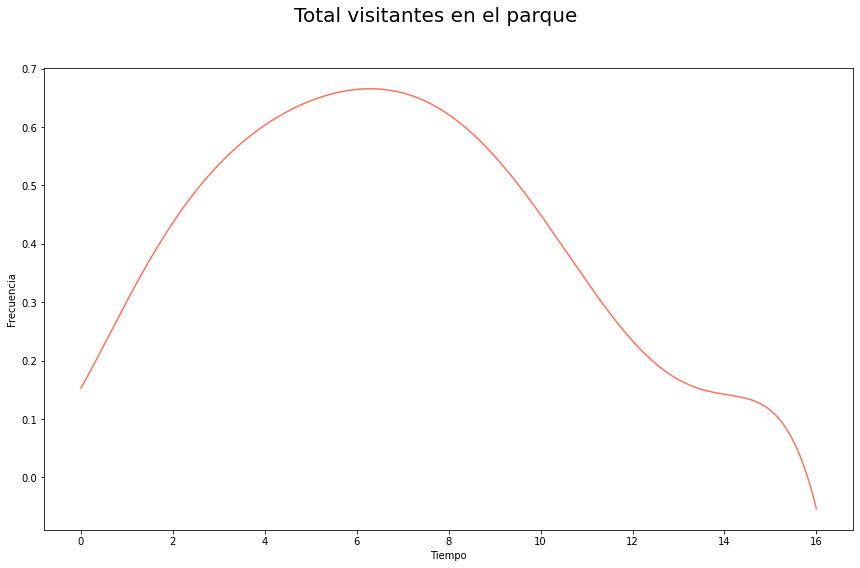

In [1]:
from matplotlib.pyplot import plot, hist, gcf, figure, xlabel, ylabel
import numpy as np
from scipy.special import gamma, factorial
import pandas as pd
import scipy.stats as st

fig = gcf()
fig.set_size_inches(14.5, 8.5)

x = np.linspace(0, 16, 16*60)
k = 5
fn = lambda x, k:  (((0.631012633902875 * ((x+1) ** 0 ) + 0.141641794969108 * ((x+1) ** 1 ) + 1.08320562754808 * ((x+1) ** 2 ) + -0.386896805430061 * ((x+1) ** 3 ) + 0.0645561077512354 * ((x+1) ** 4 ) + -0.00580069833046977 * ((x+1) ** 5 ) + 0.000263776181717327 * ((x+1) ** 6 ) + -4.72376212119374e-06 * ((x+1) ** 7 ))) / 10)

print(sum(fn(x, k)))

plot(x, fn(x,k), color='#ff725e')
fig.suptitle('Total visitantes en el parque', fontsize = 20)
xlabel('Tiempo')
ylabel('Frecuencia')

In [2]:
from simuPark.park import Activity, Attraction, Park
from simuPark.person import Person, Archetype
import random

guest_data = []
column_name = [
    'Archetype',
    'arrival_time',
    'departure_time',
    'time_in_park',
    'max_wait',
    'attractions_experienced',
    'total_wait_time',
    'average_wait_time',
    ]

for i in range(7):

    park = Park(
        fn=fn
    )

    park.start_day(max_entry_rate=95000/960, wait_time_update=5)

    for guest in park.guests:
        current_guest = []

        current_guest.append(guest.archetype)
        current_guest.append(guest.arrival_time)
        current_guest.append(guest.departure_time)
        current_guest.append(guest.departure_time - guest.arrival_time)
        current_guest.append(guest.max_wait)
        current_guest.append(guest.attractions_experienced)
        current_guest.append(guest.total_wait_time)
        if guest.attractions_experienced == 0:
            current_guest.append(0)
        else: 
            current_guest.append(guest.total_wait_time / guest.attractions_experienced)

        guest_data.append(current_guest)

guest_df = pd.DataFrame(guest_data, columns=column_name)
guest_df.to_csv(r'./datasets/BASE.csv')


Generating Entry Events...
Entry Events Generated



100%|██████████| 960/960 [00:18<00:00, 51.31it/s] 


Generating Entry Events...
Entry Events Generated



100%|██████████| 960/960 [00:19<00:00, 48.93it/s] 


Generating Entry Events...
Entry Events Generated



100%|██████████| 960/960 [00:20<00:00, 45.89it/s] 


Generating Entry Events...
Entry Events Generated



100%|██████████| 960/960 [00:19<00:00, 48.71it/s] 


Generating Entry Events...
Entry Events Generated



100%|██████████| 960/960 [00:19<00:00, 49.26it/s] 

Generating Entry Events...


Entry Events Generated



100%|██████████| 960/960 [00:19<00:00, 49.16it/s] 


Generating Entry Events...
Entry Events Generated



100%|██████████| 960/960 [00:19<00:00, 49.31it/s] 


38645
['Walk15', 'Walk10', 'ShopGifts', 'EatRestaurant', 'BathroomBreak', 'TakePictures']
['DINOSAUR', 'Expedition Everest', 'Flight of Passage', 'Kali River Rapids', 'Kilimanjaro Safaris', "Na'vi River Journey", 'TriceraTop Spin']
['Tourist', 'Average', 'Activity Enjoyer', 'Attraction Enjoyer', 'All Day Park', 'Relaxed Visitor']


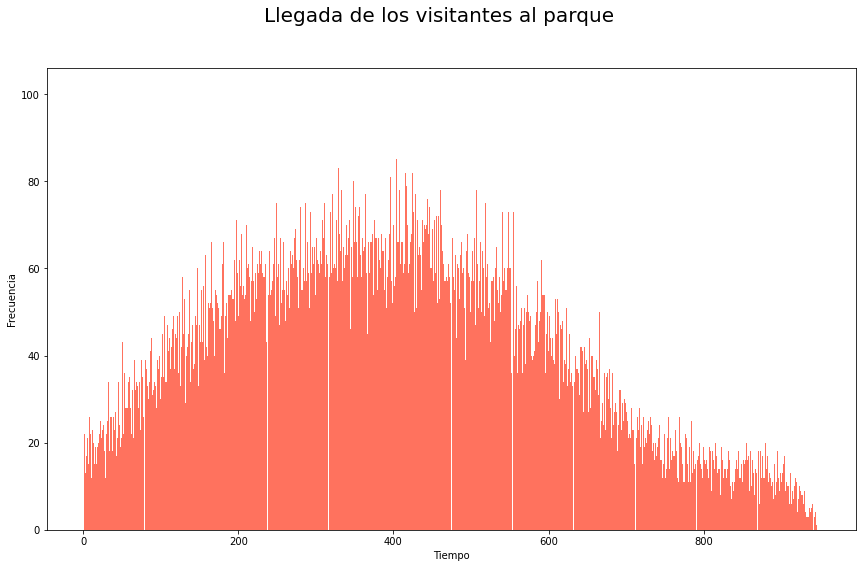

In [3]:
print(len(park.guests))

y = [guest.arrival_time for guest in park.guests]

fig = figure()
fig.set_size_inches(14.5, 8.5)
hist(y, color="#ff725e", bins=960);
fig.suptitle('Llegada de los visitantes al parque', fontsize = 20)
xlabel('Tiempo')
ylabel('Frecuencia')


print([i.name for i in park.activities])
print([i.name for i in park.attractions])
print([i.name for i in park.guest_archetypes])

In [4]:
guest_data = []
column_name = [
    'Archetype',
    'arrival_time',
    'departure_time',
    'time_in_park',
    'max_wait',
    'attractions_experienced',
    'total_wait_time',
    'average_wait_time',
    ]

for guest in park.guests:
    current_guest = []

    current_guest.append(guest.archetype)
    current_guest.append(guest.arrival_time)
    current_guest.append(guest.departure_time)
    current_guest.append(guest.departure_time - guest.arrival_time)
    current_guest.append(guest.max_wait)
    current_guest.append(guest.attractions_experienced)
    current_guest.append(guest.total_wait_time)
    if guest.attractions_experienced == 0:
        current_guest.append(0)
    else: 
        current_guest.append(guest.total_wait_time / guest.attractions_experienced)

    guest_data.append(current_guest)

guest_df = pd.DataFrame(guest_data, columns=column_name)
guest_df

,Archetype,arrival_time,departure_time,time_in_park,max_wait,attractions_experienced,total_wait_time,average_wait_time
0,Tourist,1,342,341,60,9,104,11.555556
1,Tourist,1,320,319,60,5,86,17.200000
2,Activity Enjoyer,1,181,180,10,2,19,9.500000
3,Average,1,483,482,50,8,58,7.250000
4,Activity Enjoyer,1,278,277,10,2,17,8.500000
...,...,...,...,...,...,...,...,...
38640,Activity Enjoyer,944,960,16,10,0,0,0.000000
38641,Relaxed Visitor,945,960,15,25,1,11,11.000000
38642,Average,945,960,15,50,0,0,0.000000
38643,Relaxed Visitor,946,960,14,25,0,0,0.000000


Atracciones experimentadas promedio: 3.5977487385172724
Atracciones experimentadas desviación estandar: 2.9875231301372738


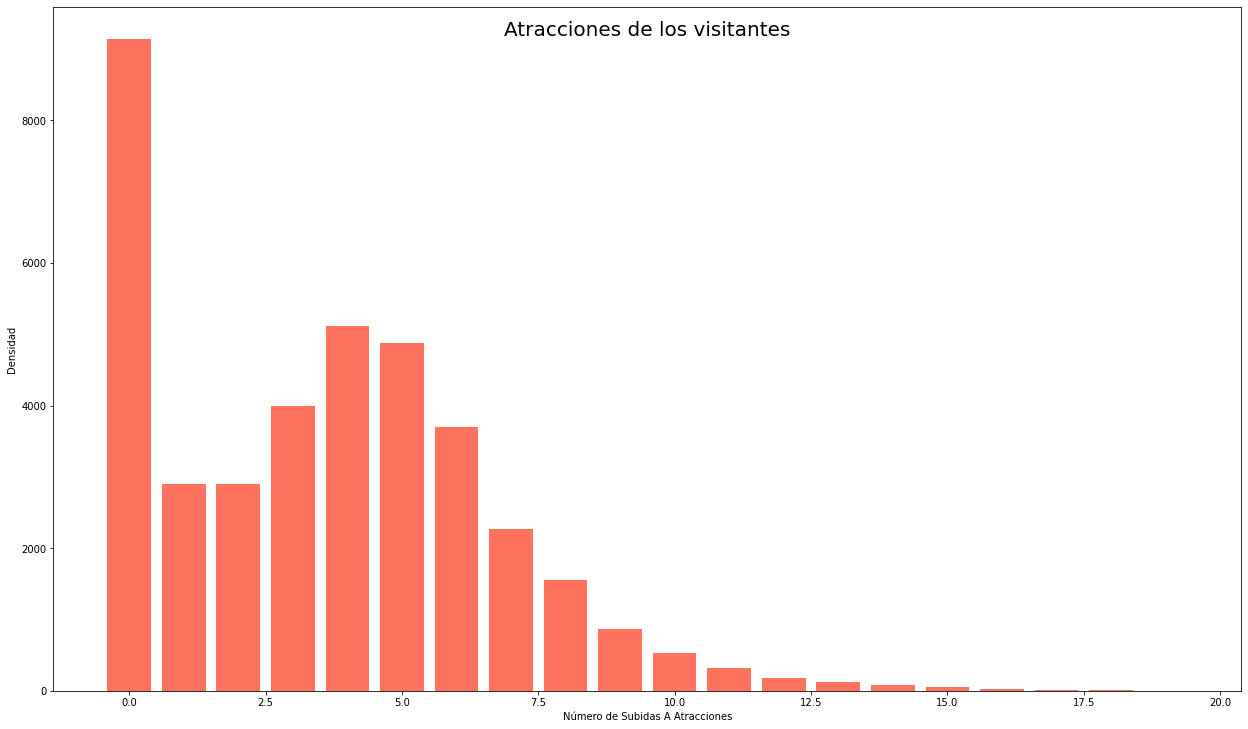

In [5]:
heights = [0 for _ in range(np.max(guest_df['attractions_experienced'])+1)]
labels = [i for i in range(np.max(guest_df['attractions_experienced'])+1)]
attrExp = [guest.attractions_experienced for guest in park.guests]

for guest in park.guests:
    heights[guest.attractions_experienced] += 1

fig = figure()
fig.set_size_inches(16.5, 9.5)
ax = fig.add_axes([0,0,1,1])
ax.bar(labels, heights, color="#ff725e");
fig.suptitle('Atracciones de los visitantes', fontsize = 20)
xlabel('Número de Subidas A Atracciones')
ylabel('Densidad')

print(f'Atracciones experimentadas promedio: {np.mean(attrExp)}')
print(f'Atracciones experimentadas desviación estandar: {np.std(attrExp)}')

36.265169262430376
(36.0816815646267, 36.448656960234054)
29509
109.0


Text(0, 0.5, 'Densidad')

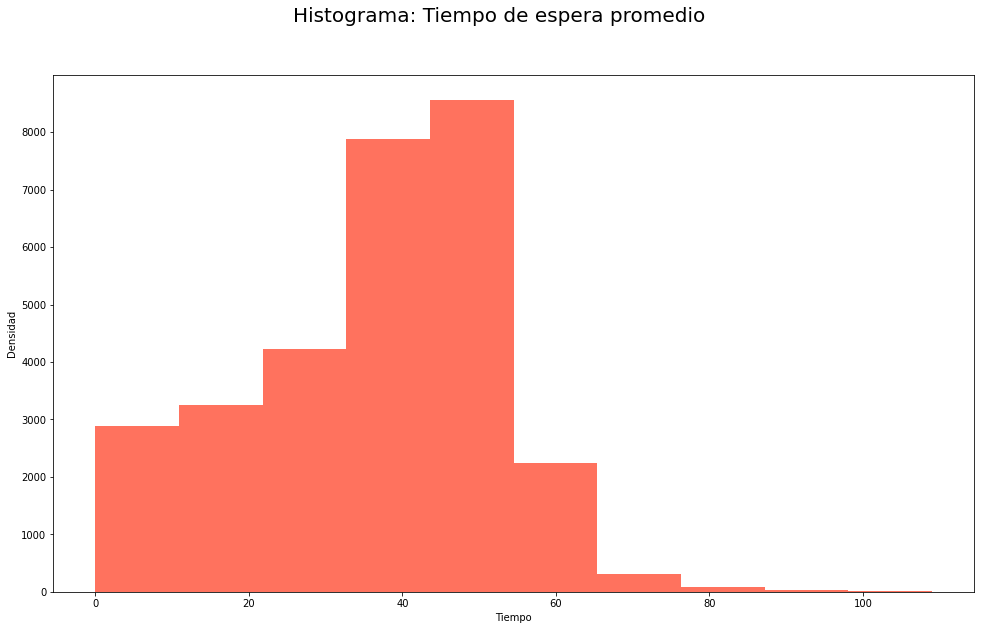

In [12]:
import scipy.stats as st

avgWaitTime = []

for guest in park.guests:
    if guest.attractions_experienced != 0:
        avgWaitTime.append(guest.total_wait_time / guest.attractions_experienced)

print(np.mean(avgWaitTime))
print(st.t.interval(alpha=0.95, df=len(avgWaitTime)-1, loc=np.mean(avgWaitTime), scale=st.sem(avgWaitTime)))
print(len(avgWaitTime))
print(max(avgWaitTime))

fig = figure()
fig.set_size_inches(16.5, 9.5)
hist(avgWaitTime, color="#ff725e");
fig.suptitle('Histograma: Tiempo de espera promedio', fontsize = 20)
xlabel('Tiempo')
ylabel('Densidad')


In [7]:
attr_wait_time = [[attr.name, attr.queue.top_wait_time] for attr in park.attractions]
attr_df = pd.DataFrame(attr_wait_time, columns=["Name", "MaximunWaitTime"])
attr_df

,Name,MaximunWaitTime
0,DINOSAUR,30
1,Expedition Everest,15
2,Flight of Passage,50
3,Kali River Rapids,10
4,Kilimanjaro Safaris,30
5,Na'vi River Journey,40
6,TriceraTop Spin,0


In [8]:
[guest for guest in park.guests if guest.attractions_experienced != 0 and guest.attractions_experienced == max(labels)][0].report()


id: 193  arvTime: 11 things_done: ['DINOSAUR', "Na'vi River Journey", 'Flight of Passage', 'Kali River Rapids', 'Expedition Everest', 'Expedition Everest', 'Expedition Everest', 'Flight of Passage', 'Expedition Everest', 'Expedition Everest', 'Kilimanjaro Safaris', "Na'vi River Journey", "Na'vi River Journey", 'Kali River Rapids', 'Flight of Passage', 'Kali River Rapids', 'DINOSAUR', 'Kilimanjaro Safaris', 'Expedition Everest'] attrExp: 19
queues_joined: 19 total_wait_time: 208 archetype: Attraction Enjoyer


In [9]:
[guest for guest in park.guests if guest.attractions_experienced != 0 and guest.total_wait_time / guest.attractions_experienced == max(avgWaitTime)][0].report()


id: 35245  arvTime: 708 things_done: ["Na'vi River Journey"] attrExp: 1
queues_joined: 2 total_wait_time: 109 archetype: Tourist


In [10]:
len(park.attractions[0].queue.in_queue)

761

In [11]:
len([guest for guest in park.guests if guest.attractions_experienced == 0])

9136